# Data is used from Statsbomb (competitions , events , matches):

* competitions - eg : UCL , worldcup , etc
* matches - take in competition id and see the matches of the required competition.
* events - take match id and visualize and analyze all the detailed events of every min (passes, shots,build up play,etc)

In [110]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [111]:
BASE_DIR = '/home/bpn8adh/My-Football-Analytics-Python/statsbomb-data/open-data/data'

In [112]:
# Load the competition file .
with open(BASE_DIR +'/competitions.json') as f:
    competitions = json.load(f)

In [113]:
# competitions

In [114]:
competitions_df = pd.read_json(BASE_DIR + '/competitions.json')

In [115]:
competitions_df[competitions_df['competition_name'] == 'Champions League'].head()

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,16,4,Europe,Champions League,male,2018/2019,2020-02-27T12:19:39.458017,2020-02-27T12:19:39.458017
1,16,1,Europe,Champions League,male,2017/2018,2020-06-11T01:24:40.306618,2020-06-11T01:24:40.306618
2,16,2,Europe,Champions League,male,2016/2017,2020-06-10T22:06:56.555602,2020-06-10T22:06:56.555602
3,16,27,Europe,Champions League,male,2015/2016,2020-06-10T20:02:56.222690,2020-06-10T20:02:56.222690
4,16,26,Europe,Champions League,male,2014/2015,2020-06-10T17:04:18.637515,2020-06-10T17:04:18.637515


In [116]:
# UEFA Champions League 2018/2019 has competition ID = 16
competition_id = 16

In [117]:
# Load spurs vs liverpool json file from the list of final matches(json) of Champions League. 

matches = pd.read_json(BASE_DIR+'/matches/'+
                      str(competition_id)+'/4.json')

In [118]:
matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,last_updated,metadata,match_week,competition_stage
0,22912,2019-06-01,21:00:00.000,"{'competition_id': 16, 'country_name': 'Europe...","{'season_id': 4, 'season_name': '2018/2019'}","{'home_team_id': 38, 'home_team_name': 'Totten...","{'away_team_id': 24, 'away_team_name': 'Liverp...",0,2,available,2019-12-16T23:09:16.168756,"{'data_version': '1.1.0', 'shot_fidelity_versi...",13,"{'id': 26, 'name': 'Final'}"


In [119]:
# Champions league final id : Spurs vs Liverpool
match_id = matches['match_id'][0]
match_id

22912

In [120]:
#  list(matches['away_team'])

# Start Match Analysis:

* Importing FcPython code for pitch drawing.
* length = 120 yards , width = 80 yards (Statsbomb data default pitch unit is in yards. While metrica sports is in metres.)

In [121]:
# Size of the pitch in yards.
pitchLengthX = 120
pitchWidthY = 80

In [122]:
home_team_required = "Liverpool"
away_team_required = "Tottenham Hotspur"

In [123]:
# Load in all match events data.
spursVsLfc_match = str(match_id)+'.json' 

In [14]:
# print('/home/bpn8adh/My-Football-Analytics-Python/statsbomb-data/open-data/data/events/'+ str(match_id)+'.json')
events_df = pd.read_json('/h/events/'+spursVsLfc_match)

In [15]:
events_df.head(4)

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,clearance,foul_won,interception,ball_recovery,counterpress,out,dribble,50_50,substitution,block
0,c4341845-358d-43e7-9af4-9a39aa1d90f1,1,1,2020-07-02,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 38, 'name': 'Tottenham Hotspur'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6001a7ed-2c00-4cb4-ba33-7ac2b7d07c40,2,1,2020-07-02,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 38, 'name': 'Tottenham Hotspur'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52cdf1be-4cbd-4026-b802-e5c3dce19e9c,3,1,2020-07-02,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 38, 'name': 'Tottenham Hotspur'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,97668e09-1ce7-4752-912c-b3a5a1bf6013,4,1,2020-07-02,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 38, 'name': 'Tottenham Hotspur'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# list(events_df.iloc[33].reset_index().iloc[23])
# events_df.iloc[33].reset_index()
"""
Function for type of play: goal, pass,etc
"""
def get_shot_type(type_dict):
    return type_dict.get('name')

In [23]:
# unpacking type column dictionary for knowing type of play.
events_df['shot_type'] = events_df['type'].apply(get_shot_type)

In [32]:
events_df.iloc[33]['shot_type']

'Shot'

In [35]:
total_shots_df = events_df[events_df['shot_type'] == 'Shot']

In [38]:
# All shots in first half of the game. period = 1 .. 2nd half means period = 2
first_half_shots = total_shots_df[total_shots_df['period'] == 1]

In [77]:
shot_details_1st_df['start_location'] = pd.DataFrame(first_half_shots['location'])

In [78]:
shot_details_1st_df['shot_details'] = pd.DataFrame(first_half_shots['shot'])

In [79]:
shot_details_1st_df.head()

,location,shot_details,end_location,start_location
33,"[108.2, 40.1]","{'statsbomb_xg': 0.76, 'end_location': [120.0,...","[120.0, 42.5, 0.9]","[108.2, 40.1]"
341,"[91.9, 43.1]","{'statsbomb_xg': 0.022700306, 'end_location': ...","[120.0, 46.5, 5.2]","[91.9, 43.1]"
586,"[90.2, 59.3]","{'statsbomb_xg': 0.011111712000000001, 'end_lo...","[120.0, 34.7, 0.8]","[90.2, 59.3]"
757,"[95.2, 47.2]","{'statsbomb_xg': 0.038991462000000005, 'end_lo...","[99.7, 46.2]","[95.2, 47.2]"
767,"[113.0, 59.5]","{'statsbomb_xg': 0.014388007000000001, 'end_lo...","[113.2, 0.1]","[113.0, 59.5]"


In [83]:
def get_shot_end_location(shot_details_dict):
    return shot_details_dict.get('end_location')

def get_shot_outcome(shot_details_dict):
    return shot_details_dict.get('outcome')
    
def get_shot_type(shot_details_dict):
    return shot_details_dict.get('type')

In [84]:
shot_details_1st_df['end_location'] = shot_details_1st_df['shot_details'].apply(get_shot_end_location)

In [86]:
shot_details_1st_df['outcome'] = shot_details_1st_df['shot_details'].apply(get_shot_outcome)

In [87]:
shot_details_1st_df['type'] = shot_details_1st_df['shot_details'].apply(get_shot_type)

In [89]:
shot_details_1st_df.drop(['location'], axis = 1 , inplace = True)

In [91]:
shot_details_1st_df

,shot_details,end_location,start_location,outcome,type
33,"{'statsbomb_xg': 0.76, 'end_location': [120.0,...","[120.0, 42.5, 0.9]","[108.2, 40.1]","{'id': 97, 'name': 'Goal'}","{'id': 88, 'name': 'Penalty'}"
341,"{'statsbomb_xg': 0.022700306, 'end_location': ...","[120.0, 46.5, 5.2]","[91.9, 43.1]","{'id': 98, 'name': 'Off T'}","{'id': 87, 'name': 'Open Play'}"
586,"{'statsbomb_xg': 0.011111712000000001, 'end_lo...","[120.0, 34.7, 0.8]","[90.2, 59.3]","{'id': 98, 'name': 'Off T'}","{'id': 87, 'name': 'Open Play'}"
757,"{'statsbomb_xg': 0.038991462000000005, 'end_lo...","[99.7, 46.2]","[95.2, 47.2]","{'id': 96, 'name': 'Blocked'}","{'id': 87, 'name': 'Open Play'}"
767,"{'statsbomb_xg': 0.014388007000000001, 'end_lo...","[113.2, 0.1]","[113.0, 59.5]","{'id': 101, 'name': 'Wayward'}","{'id': 87, 'name': 'Open Play'}"
1346,"{'statsbomb_xg': 0.012589856, 'end_location': ...","[118.3, 37.9, 2.4]","[98.4, 20.4]","{'id': 100, 'name': 'Saved'}","{'id': 87, 'name': 'Open Play'}"
1352,"{'statsbomb_xg': 0.02638541, 'end_location': [...","[120.0, 43.3, 6.4]","[97.6, 37.4]","{'id': 98, 'name': 'Off T'}","{'id': 87, 'name': 'Open Play'}"
1401,"{'statsbomb_xg': 0.015078909000000001, 'end_lo...","[96.1, 46.2]","[89.0, 47.9]","{'id': 96, 'name': 'Blocked'}","{'id': 87, 'name': 'Open Play'}"
1422,"{'statsbomb_xg': 0.01395537, 'end_location': [...","[97.2, 32.8]","[94.0, 31.3]","{'id': 96, 'name': 'Blocked'}","{'id': 87, 'name': 'Open Play'}"
1560,"{'statsbomb_xg': 0.03756312, 'end_location': [...","[120.0, 37.2, 6.0]","[96.1, 41.6]","{'id': 98, 'name': 'Off T'}","{'id': 87, 'name': 'Open Play'}"


In [95]:
len(shot_details_1st_df)

10

In [107]:
# testing loop code
for i,row in shot_details_1st_df.iterrows():
#     print(i)
    print(row['start_location'])

[108.2, 40.1]
[91.9, 43.1]
[90.2, 59.3]
[95.2, 47.2]
[113.0, 59.5]
[98.4, 20.4]
[97.6, 37.4]
[89.0, 47.9]
[94.0, 31.3]
[96.1, 41.6]


# Colors for shot type:

* goal : green
* saved : red
* blocked : yellow

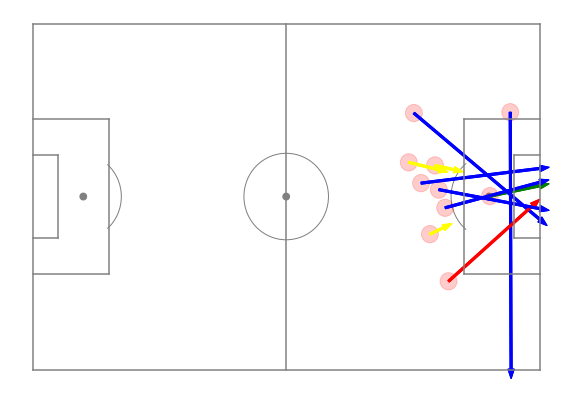

In [108]:
#Draw the pitch
from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
# Plot the shot
circleSize = 2

for i,row in shot_details_1st_df.iterrows():
    x = row['start_location'][0] #108.2
    y = row['start_location'][1]  #40.1
    shotCircle = plt.Circle((x,y),circleSize,color = "red")
    shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
    
    dx = row['end_location'][0] - x # 120
    dy = row['end_location'][1] - y # 42.5
    
    if row['outcome'].get('name') == 'Goal' :
        passArrow = plt.arrow(x, y, dx, dy, width = 0.5 ,color = "green")
    elif row['outcome'].get('name') == 'Saved':
        passArrow = plt.arrow(x, y, dx, dy, width = 0.5 ,color = "red")
    elif row['outcome'].get('name') == 'Blocked':
        passArrow = plt.arrow(x, y, dx, dy, width = 0.5 ,color = "yellow")
    else:
        passArrow = plt.arrow(x, y, dx, dy, width = 0.5 ,color = "blue")
    
    ax.add_patch(passArrow)        
        

fig.set_size_inches(10, 7)
fig.savefig('Output/spursvslfc_ucl_final_1sthalf_goal.pdf', dpi=100) 
plt.show()